In [1]:
! pip install plotly
! pip install folium

In [6]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [7]:
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [8]:
import folium

In [9]:
# read the json file from your data folder into a data frame
#df = pd.read_csv(r'C:\Users\chz\Documents\BI Exercise\\BI Exam\global air pollution dataset.csv')
df = pd.read_csv(r'DataSæt\global air pollution dataset.csv')

In [10]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [11]:
df.shape

(23463, 12)

In [12]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [13]:
# Remove rows with missing 'Country' and  'cities' values and create a cleaned DataFrame
df_cleaned = df.dropna(subset=['Country', 'City'])

In [14]:
df_cleaned.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [15]:
df = df_cleaned

In [16]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

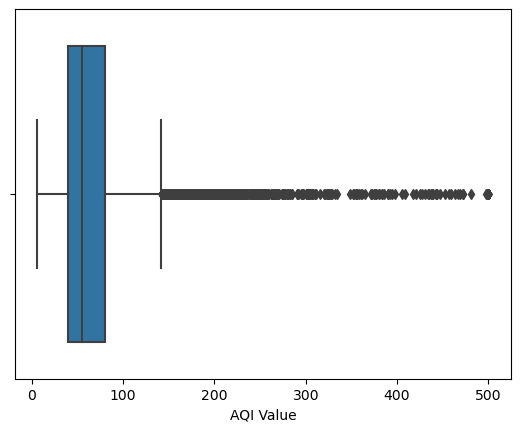

In [17]:
# graph for detecting outliers in the 'AQI Value' column
sns.boxplot(x=df['AQI Value'])
plt.show()

# Assuming you decide to remove outliers beyond the 1.5 * IQR range
Q1 = df['AQI Value'].quantile(0.25)
Q3 = df['AQI Value'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[~((df['AQI Value'] < (Q1 - 1.5 * IQR)) | (df['AQI Value'] > (Q3 + 1.5 * IQR)))]


In [18]:
df.sample(50)

Country                 City  AQI Value  \
1785                             Viet Nam            Bac Giang        179   
18065                            Pakistan     Tando Ghulam Ali        156   
13983                               India               Gadwal         81   
14903                            Pakistan        Ahmadpur East        196   
15298                  Russian Federation            Rubtsovsk         37   
881                             Indonesia             Kembaran         54   
4930                                India                Saiha         33   
358                           Philippines                Baras         51   
6502             United States of America              Roswell         88   
21907                              Mexico             Jiutepec        153   
18642                              Brazil              Vazante         24   
11326            United States of America              Lynwood        118   
10756                  Russian Federation  Staromyshastovskaya         34   
2475                   Russian Federation               Kargat         37   
7356                                India             Durgapur        128   
9145                   Russian Federation              Kodinsk         56   
21775            United States of America            Waterbury         62   
7000                               France             Marmande         38   
3575          United Republic of Tanzania              Makungu         21   
4718                         South Africa           Thaba Nchu         90   
19323                          Kazakhstan          Stepnogorsk         27   
11740                              France           Mitry Mory         68   
2087                               Serbia            Surdulica         59   
4515                                India               Khetia        137   
16096                               Japan              Kameoka         43   
18110                              France       Sainte Suzanne         41   
19897                              Canada       Grande Prairie         34   
2791                               Poland              Brwinow         34   
10810  Venezuela (Bolivarian Republic of)               Chacao        139   
3157                           Madagascar         Maroantsetra         22   
18908            United States of America              Pahrump         43   
22428                        Turkmenistan                Annau        110   
20450                              France               Begles         41   
22446            United States of America         South Jordan         44   
20203                         Philippines             Magallon         45   
16660            United States of America       Council Bluffs         43   
19664                              Mexico              Temixco        119   
20974                              France                Melun         34   
17700                              Brazil            Itabaiana         51   
4247                                India          Dhrangadhra        150   
16563                  Russian Federation              Kamenka         46   
12848                               India            Kalghatgi         50   
21396            United States of America          West Plains         81   
2390                               Gambia            Serekunda        158   
17057            United States of America          East Peoria         48   
22201                             Germany            Rotenburg         56   
8438                             Pakistan          Chuhar Kana        175   
2964                               Brazil           Jaguariuna         63   
8866                                Japan                 Kaga         42   
19057                              France   Saint Leu La Foret         50   

                         AQI Category  CO AQI Value CO AQI Category  \
1785                        Unhealt

In [19]:
denmark_df = df[df['Country'] == 'Denmark']

In [20]:
print(denmark_df)

       Country            City  AQI Value AQI Category  CO AQI Value  \
162    Denmark   Frederikssund         36         Good             1   
1045   Denmark    Greve Strand         39         Good             0   
1357   Denmark        Ringsted         36         Good             0   
1488   Denmark            Nuuk         23         Good             1   
1946   Denmark           Skive         38         Good             0   
2213   Denmark        Birkerod         36         Good             1   
2241   Denmark        Vaerlose         36         Good             1   
2249   Denmark     Espergaerde         36         Good             1   
2537   Denmark         Thisted         46         Good             0   
2581   Denmark          Struer         43         Good             0   
2787   Denmark     Bronderslev         54     Moderate             0   
2952   Denmark           Ikast         42         Good             1   
3279   Denmark       Svendborg         38         Good          

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Value     23035 non-null  int64 
 11  PM2.5 AQI Category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


In [22]:
df.describe()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23035.000000  23035.000000     23035.000000   23035.000000   
mean      72.344693      1.376254        35.233905       3.084741   
std       56.360992      1.844926        28.236613       5.281708   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       80.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23035.000000  
mean         68.883482  
std          55.057396  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000

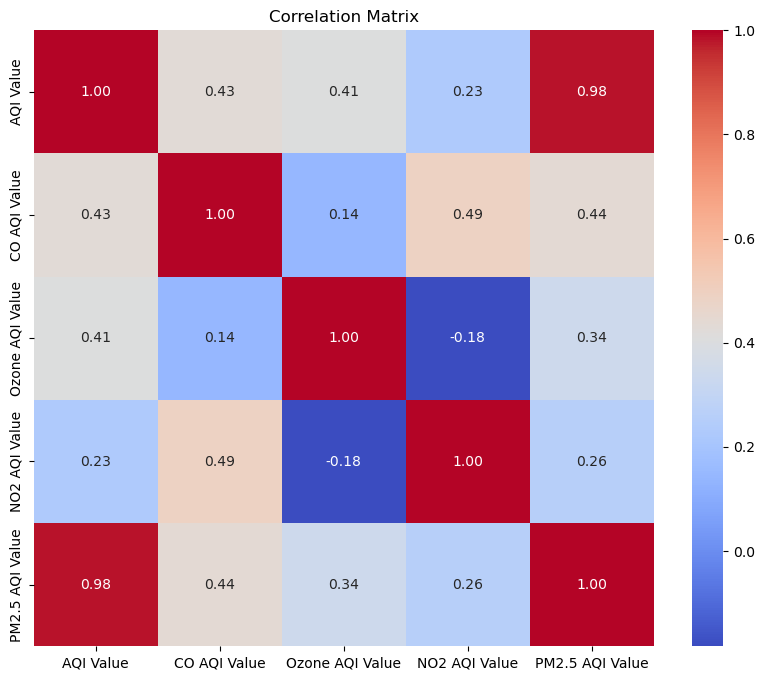

In [23]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])


df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\chz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


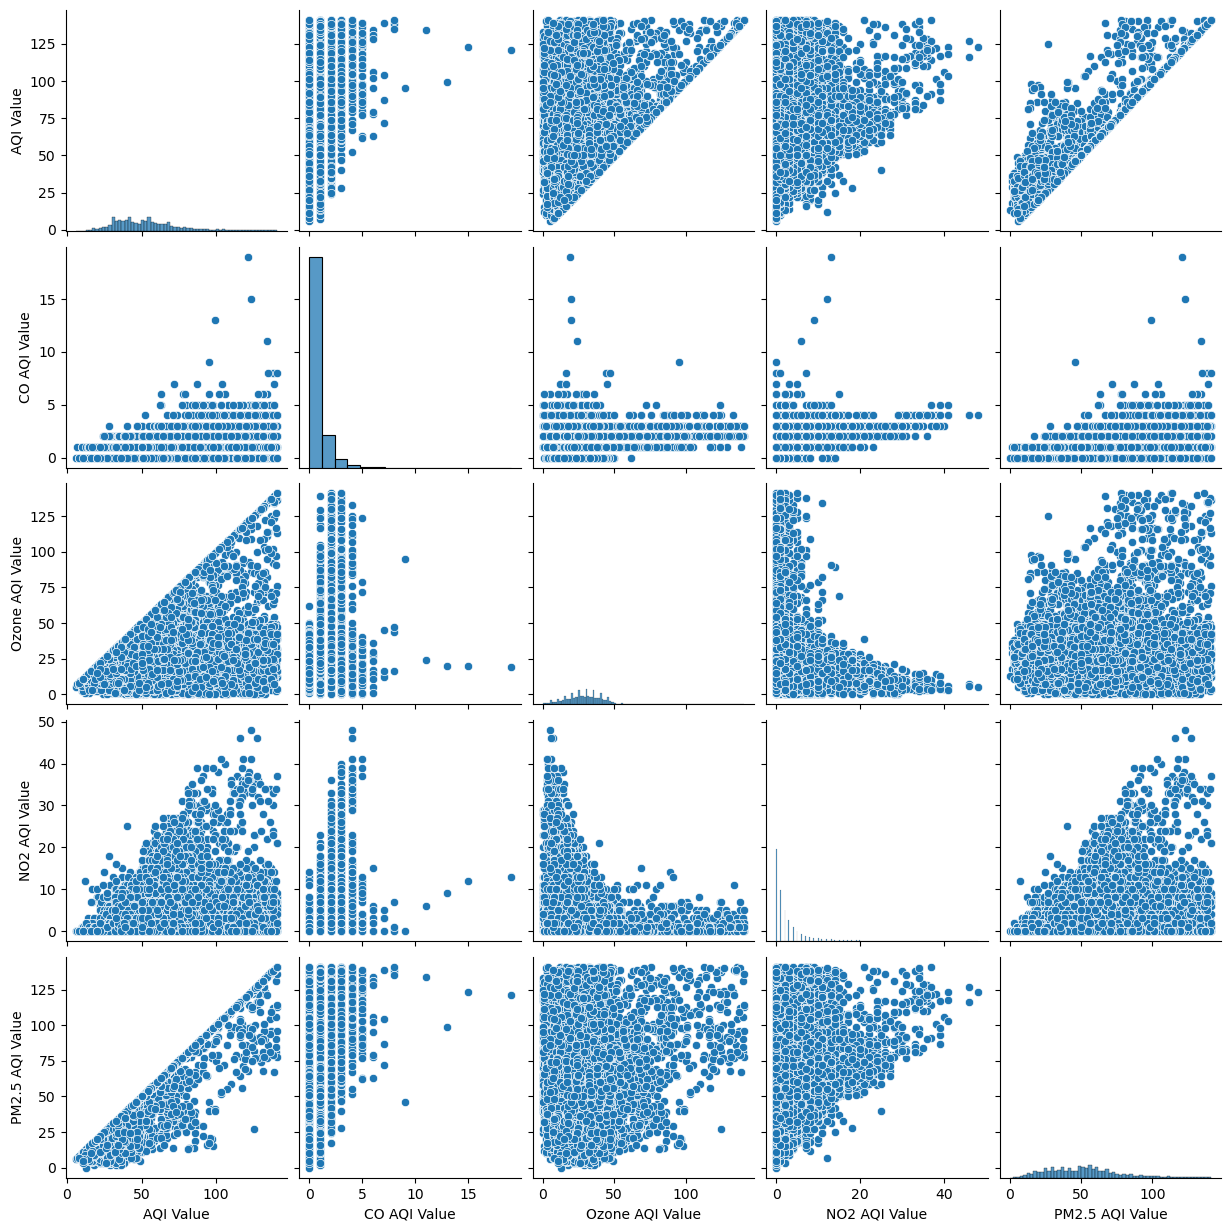

In [24]:
# Visualizing relationships between all numerical features
sns.pairplot(df_filtered.select_dtypes(include=['float64', 'int64']))
plt.show()


<Figure size 1000x600 with 0 Axes>

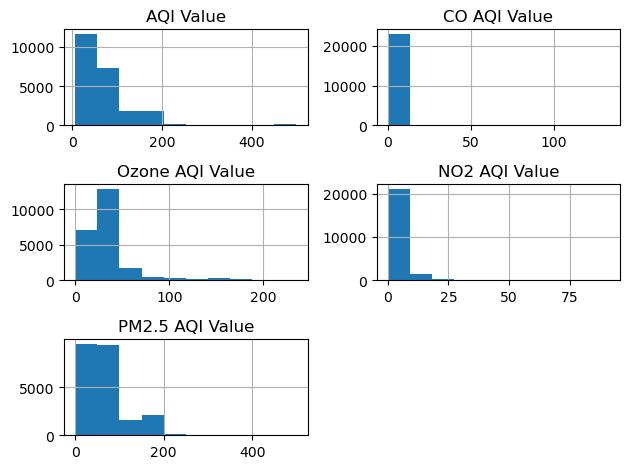

In [25]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

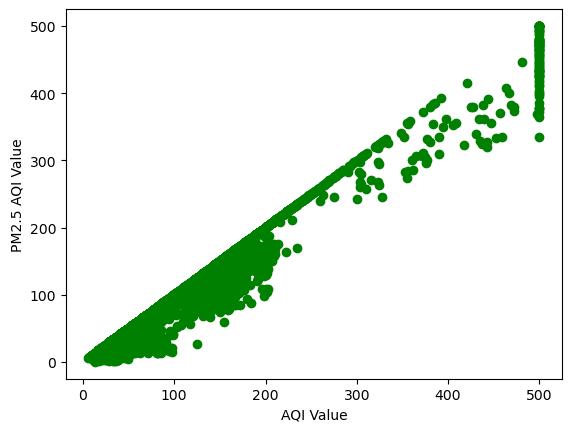

In [26]:
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.scatter(df['AQI Value'], df['PM2.5 AQI Value'], color='green')
plt.show()

C:\Users\chz\AppData\Local\Temp\ipykernel_14788\1350621379.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)


<Axes: xlabel='AQI Value', ylabel='Density'>

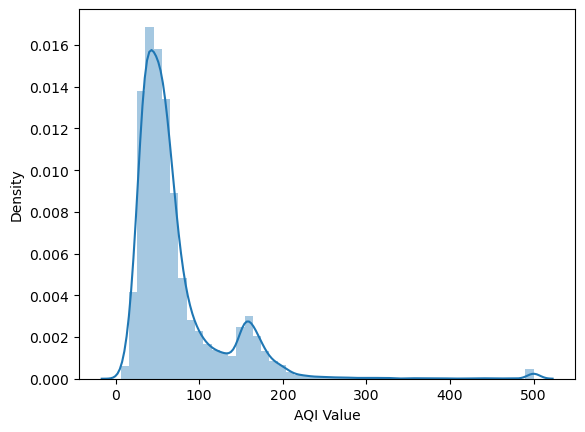

In [27]:
sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)  

C:\Users\chz\AppData\Local\Temp\ipykernel_14788\1301984605.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True)


<Axes: xlabel='PM2.5 AQI Value', ylabel='Density'>

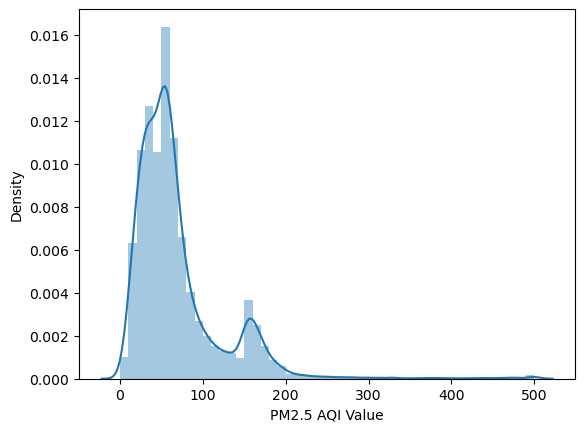

In [28]:
sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True) 

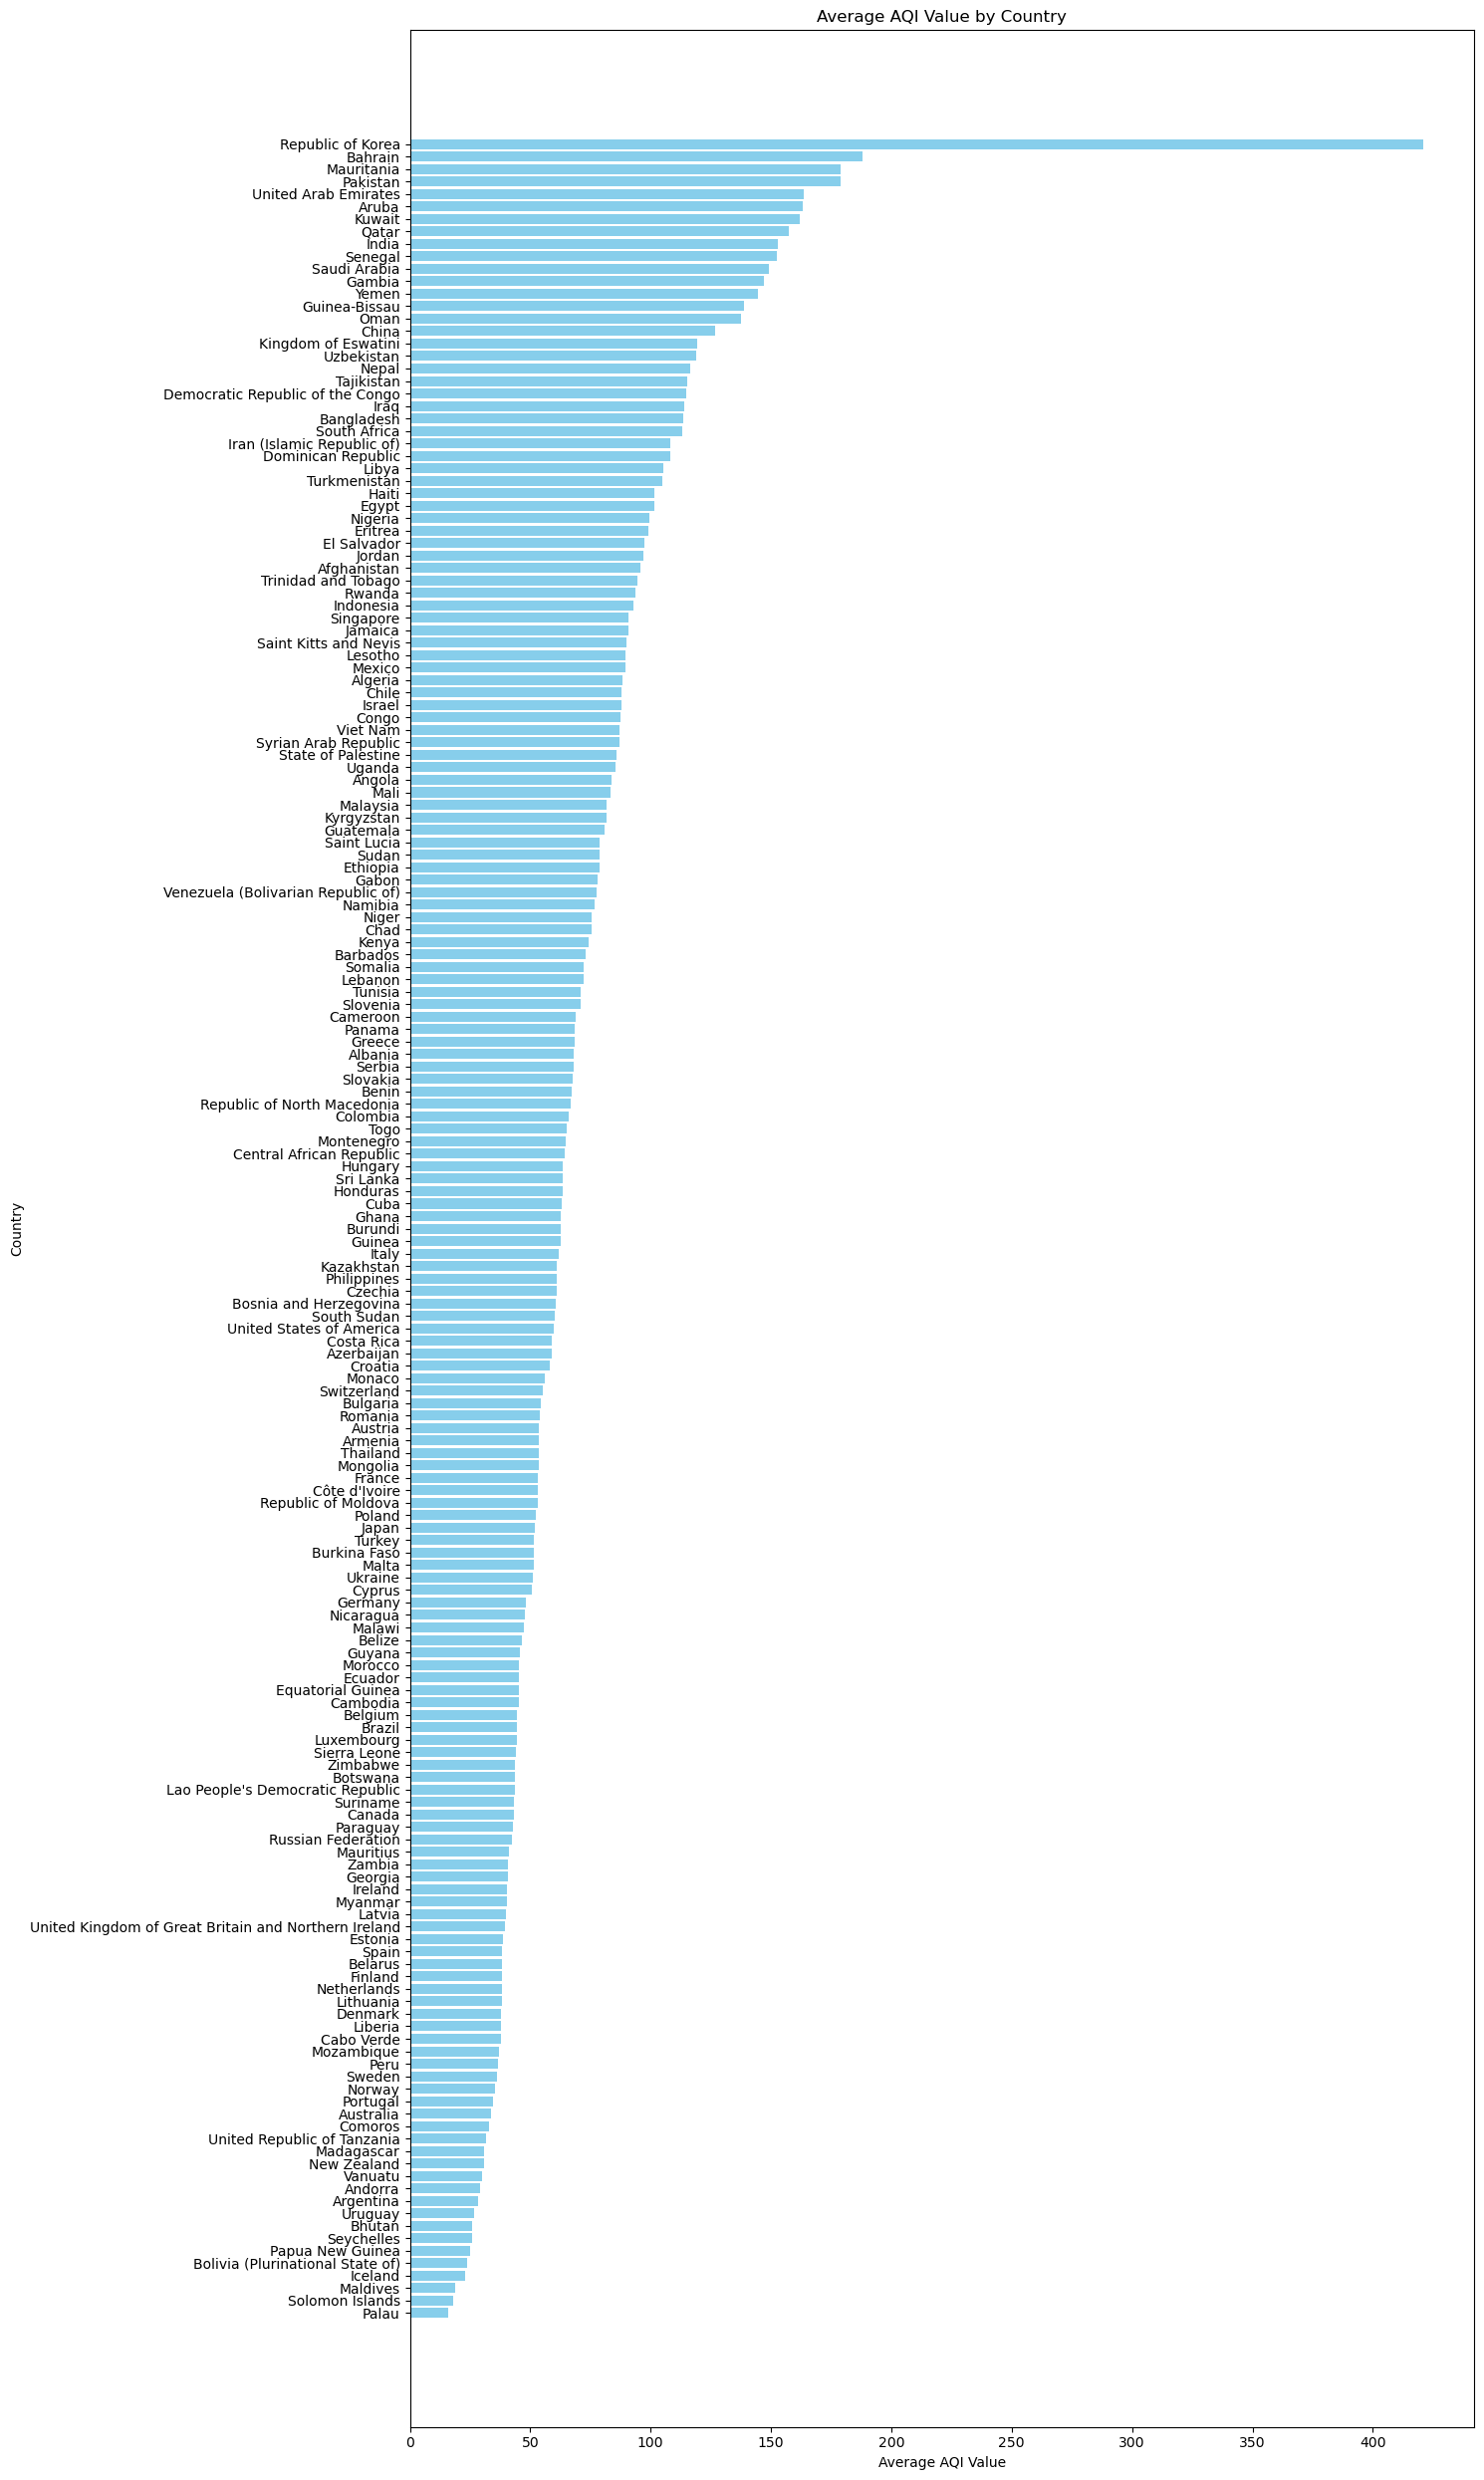

In [29]:
# Grouping the data by 'Country' and calculating the mean 'AQI Value' for each country
country_aqi_means = df.groupby('Country')['AQI Value'].mean()

# Sorting the countries by AQI value for better visualization
country_aqi_means = country_aqi_means.sort_values()

# Creating the bar chart
plt.figure(figsize=(15, 25)) 
plt.barh(country_aqi_means.index, country_aqi_means.values, color='skyblue') # Horizontal bar chart
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.title('Average AQI Value by Country')
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.

plt.show()

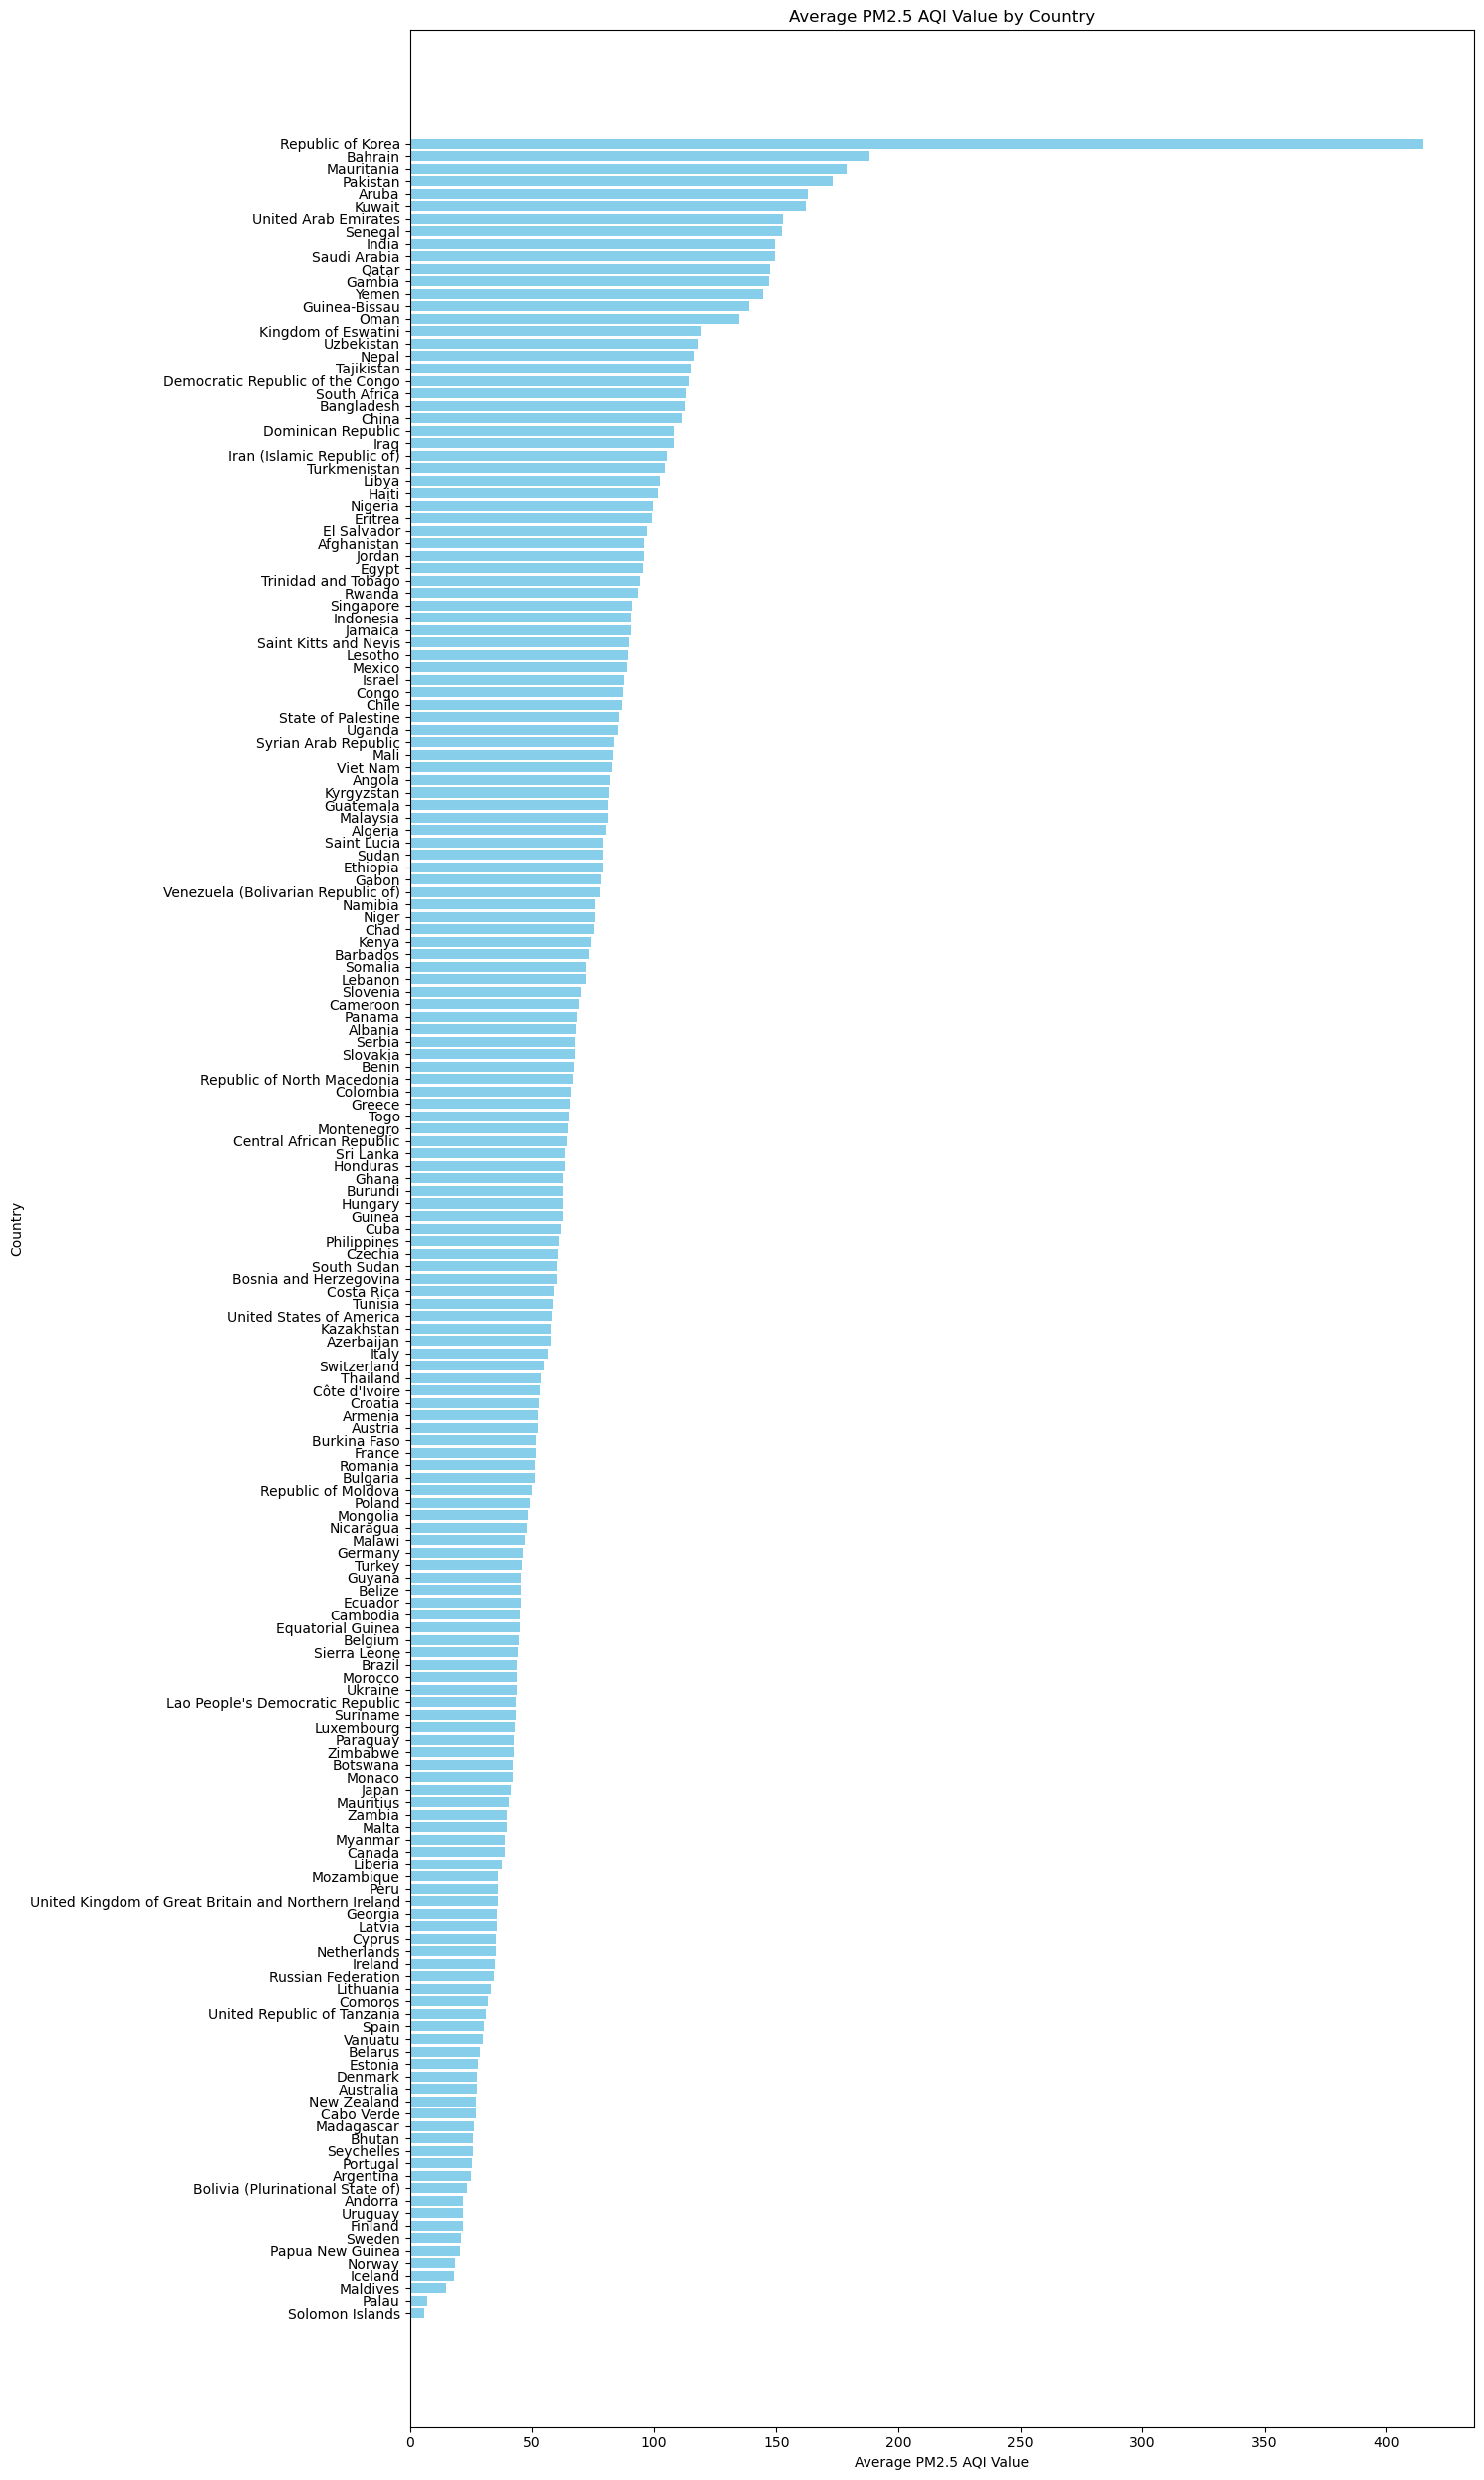

In [30]:
# Grouping the data by 'Country' and calculating the mean 'PM2.5 AQI Value' for each country
country_pm25_means = df.groupby('Country')['PM2.5 AQI Value'].mean()
# Sorting the countries by PM2.5 AQI value for better visualization
country_pm25_means = country_pm25_means.sort_values()
# Creating the bar chart
plt.figure(figsize=(15, 25))
plt.barh(country_pm25_means.index, country_pm25_means.values, color='skyblue') # Horizontal bar chart
plt.xlabel('Average PM2.5 AQI Value')
plt.ylabel('Country')
plt.title('Average PM2.5 AQI Value by Country')
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()


In [31]:
X = df['AQI Value'].values.reshape(-1, 1)
y = df['PM2.5 AQI Value'].values.reshape(-1, 1)

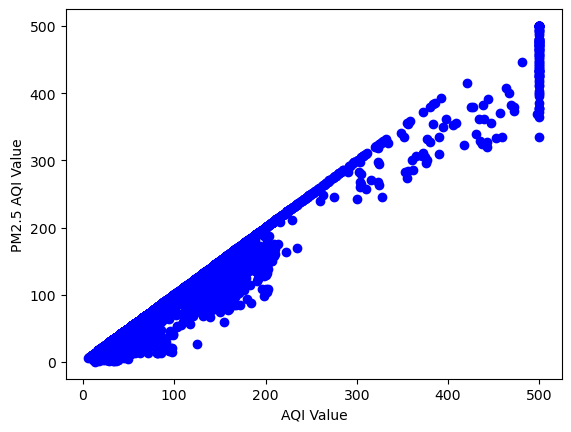

In [32]:
# plot all
plt.ylabel('PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.scatter(X, y, color='blue')
plt.show()

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [34]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19579, 1)
(19579, 1)
(3456, 1)
(3456, 1)


In [35]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [36]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [37]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [38]:
a

array([[0.96184317]])

In [39]:
b

array([-0.70109563])

In [40]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[ 36.8107881 ],
       [ 61.81871059],
       [ 46.42921983],
       ...,
       [ 16.61208148],
       [ 16.61208148],
       [166.6596164 ]])

In [41]:
y_test

array([[ 18],
       [ 65],
       [ 20],
       ...,
       [ 18],
       [ 18],
       [174]], dtype=int64)

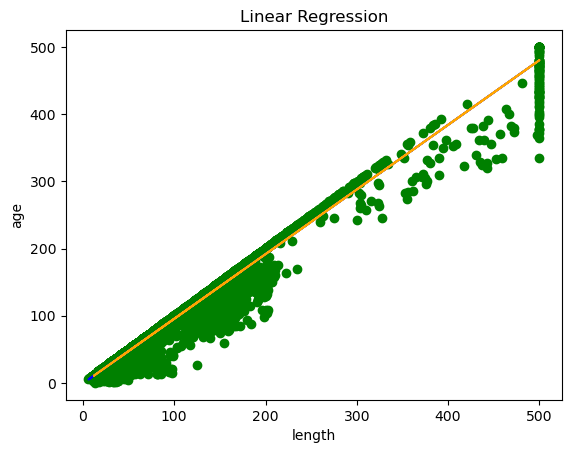

In [42]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('length')
plt.ylabel('age')
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = myreg.predict(X_test)

# Calculating metrics
print("R^2: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2:  0.967159583070837
RMSE:  9.664844336038252


In [44]:
#create a scatter plot of the 'AQI Value' and 'PM2.5 AQI Value' columns and color the points by the 'Country' column
fig = px.scatter(df, x='AQI Value', y='PM2.5 AQI Value', color='Country', title='AQI Value vs PM2.5 AQI Value')
fig.show()


In [45]:
# divide the data into 5 clusters using the KMeans algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['AQI Value', 'PM2.5 AQI Value']])
df['cluster'] = kmeans.predict(df[['AQI Value', 'PM2.5 AQI Value']])
df.sample(10)



C:\Users\chz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Country         City  AQI Value  \
23457                          Slovakia       Martin         71   
1909                            Germany   Angermunde         35   
21910                           Hungary   Mateszalka         58   
14248                             India      Shimoga         55   
22724                       Philippines      Surigao         53   
2277                           Thailand  Pak Phanang         69   
5838                            Germany   Denzlingen         67   
23451                         Sri Lanka      Wattala         72   
21189  Democratic Republic of the Congo       Kikwit        267   
11618                            France         Bron         69   

         AQI Category  CO AQI Value CO AQI Category  Ozone AQI Value  \
23457        Moderate             1            Good               39   
1909             Good             1            Good               35   
21910        Moderate             1            Good               52   
14248        Moderate             1            Good               14   
22724        Moderate             1            Good               22   
2277         Moderate             2            Good               34   
5838         Moderate             1            Good               54   
23451        Moderate             1            Good               24   
21189  Very Unhealthy            16            Good              106   
11618        Moderate             1            Good               55   

                   Ozone AQI Category  NO2 AQI Value NO2 AQI Category  \
23457                            Good              1             Good   
1909                             Good              1             Good   
21910                        Moderate              0             Good   
14248                            Good              3             Good   
22724                            Good              0             Good   
2277                             Good              0             Good   
5838                         Moderate              0             Good   
23451                            Good              1             Good   
21189  Unhealthy for Sensitive Groups             10             Good   
11618                        Moderate              0             Good   

       PM2.5 AQI Value PM2.5 AQI Category  cluster  
23457               71           Moderate        0  
1909                24               Good        3  
21910               58           Moderate        0  
14248               55           Moderate        0  
22724               53           Moderate        0  
2277                69           Moderate        0  
5838                67           Moderate        0  
23451               72           Moderate        0  
21189              267     Very Unhealthy        1  
11618               69           Moderate        0

In [47]:
# create a scatter plot of the 'AQI Value' and 'PM2.5 AQI Value' columns and color the points by the 'cluster' column
fig = px.scatter(df, x='AQI Value', y='PM2.5 AQI Value', color='cluster', title='AQI Value vs PM2.5 AQI Value')
fig.show()


C:\Users\chz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Centroids:
 [[ 32.71688082  25.91197755]
 [ 89.10417715  88.20684449]
 [ 49.85544693  48.62744413]
 [121.46547085 119.71569507]
 [ 66.13314323  65.54902391]]


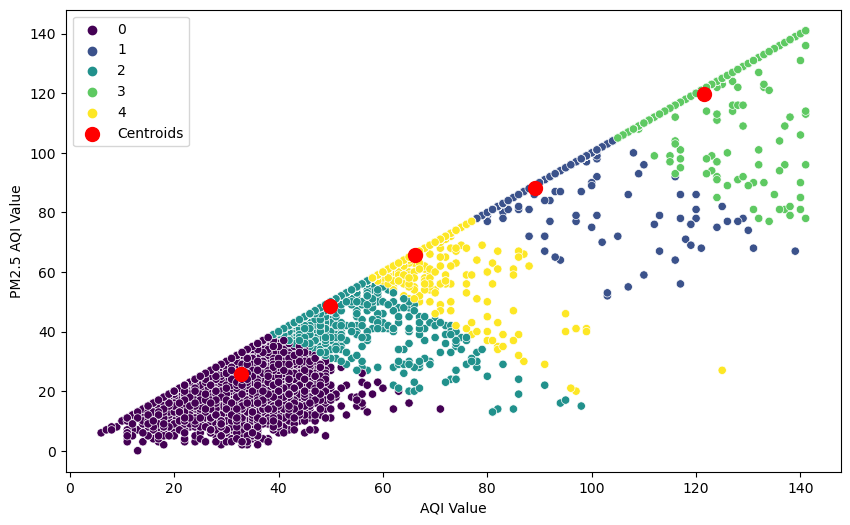

In [46]:
# Fit the model and predict clusters
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_filtered[['AQI Value', 'PM2.5 AQI Value']])
df_filtered['cluster'] = kmeans.labels_

# Analyze centroids
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

# Plotting clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='AQI Value', y='PM2.5 AQI Value', hue='cluster', palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
plt.legend()
plt.show()
